In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.graphics.api import qqplot
import os
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [5]:
dir_path = "C:\\Users\\weber\\Documents\\Project-1018"
dir_path =  "C:\\Users\\chen5\\ProbTimeSeries\\Project"

In [6]:
data = pd.read_csv(os.path.join(dir_path,'importdata','HOURLY_LOAD-202208.csv'))

In [7]:
data

,MarketHour,CSWS,EDE,GRDA,INDN,KACY,KCPL,LES,MPS,NPPD,OKGE,OPPD,SECI,SPRM,SPS,WAUE,WFEC,WR
0,08/01/2022 06:00:00,5921.979,552.789,718.267,144.774,334.646,2165.933,450.939,1167.743,3038.855,4133.017,1725.040,736.784,400.886,4451.515,3311.000,1217.344,4156.282
1,08/01/2022 07:00:00,5676.878,518.736,760.611,134.214,312.163,2039.448,421.817,1092.053,2955.992,3977.195,1628.749,700.359,377.864,4321.825,3246.612,1171.366,3925.043
2,08/01/2022 08:00:00,5487.689,499.554,791.414,126.417,311.814,1930.839,400.730,1040.493,2877.460,3876.880,1544.144,667.656,362.290,4224.715,3208.668,1143.330,3738.987
3,08/01/2022 09:00:00,5388.093,488.896,796.095,123.577,301.093,1865.714,387.193,993.037,2829.621,3826.183,1490.562,653.168,352.197,4158.655,3176.231,1123.487,3634.014
4,08/01/2022 10:00:00,5378.077,493.719,787.370,121.022,303.576,1858.928,382.089,991.326,2820.477,3811.603,1470.734,650.676,353.732,4102.959,3202.621,1114.424,3616.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,09/01/2022 01:00:00,7772.379,844.710,984.804,191.034,363.280,2599.117,619.939,1468.947,3501.208,5709.688,2193.250,932.935,549.751,3971.176,4308.471,1436.407,5399.233
740,09/01/2022 02:00:00,7427.238,808.791,955.567,176.464,354.621,2476.311,597.850,1386.748,3423.472,5511.957,2117.423,890.655,516.126,3917.394,4190.632,1398.288,5123.417
741,09/01/2022 03:00:00,6952.782,741.009,899.568,158.262,333.600,2326.732,564.697,1285.525,3299.299,5225.879,1989.168,870.498,475.247,3700.453,4028.525,1343.675,4793.956
742,09/01/2022 04:00:00,6423.723,679.433,853.791,138.238,314.749,2118.982,506.040,1185.127,3126.090,4870.231,1817.832,813.996,431.061,3570.827,3817.862,1263.726,4370.121


In [8]:
# Basic Preprocessing
data.columns = data.columns.str.replace(' ','')

In [9]:
# No missing vals
data.isnull().sum()

MarketHour    0
CSWS          0
EDE           0
GRDA          0
INDN          0
KACY          0
KCPL          0
LES           0
MPS           0
NPPD          0
OKGE          0
OPPD          0
SECI          0
SPRM          0
SPS           0
WAUE          0
WFEC          0
WR            0
dtype: int64

In [10]:
data.columns

Index(['MarketHour', 'CSWS', 'EDE', 'GRDA', 'INDN', 'KACY', 'KCPL', 'LES',
       'MPS', 'NPPD', 'OKGE', 'OPPD', 'SECI', 'SPRM', 'SPS', 'WAUE', 'WFEC',
       'WR'],
      dtype='object')

(array([ 87., 117., 106.,  86.,  82.,  77.,  76.,  60.,  29.,  24.]),
 array([ 4548.997 ,  5095.0504,  5641.1038,  6187.1572,  6733.2106,
         7279.264 ,  7825.3174,  8371.3708,  8917.4242,  9463.4776,
        10009.531 ]),
 <BarContainer object of 10 artists>)

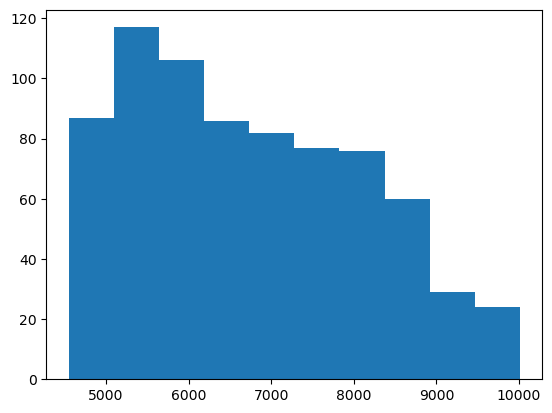

In [11]:
plt.hist(data['CSWS'])

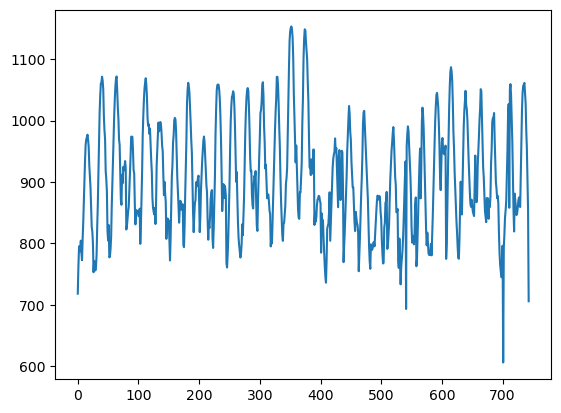

In [12]:
plt.plot(data['GRDA'])

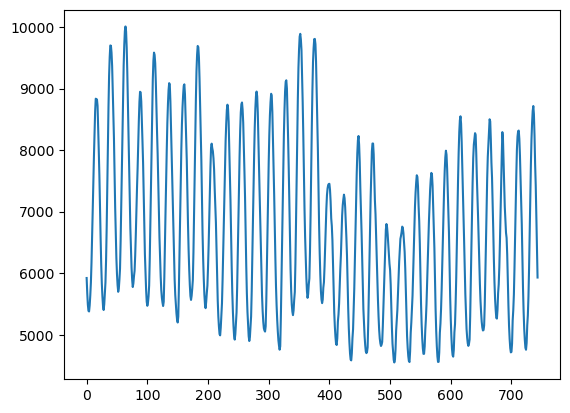

In [13]:
plt.plot(data['CSWS'])

In [14]:
csws = data['CSWS']

In [15]:
csws.shape

(744,)

In [16]:
idx = int(0.8*csws.shape[0])
train = csws[:idx]
test = csws[idx:]

In [17]:

auto_arima = pm.auto_arima(train, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [18]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  595
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -3342.896
Date:                Sun, 04 Dec 2022   AIC                           6699.792
Time:                        16:50:33   BIC                           6730.500
Sample:                             0   HQIC                          6711.751
                                - 595                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0747      0.254     -0.294      0.769      -0.573       0.423
ar.L1          1.9261      0.004    535.518      0.000       1.919       1.933
ar.L2         -0.9941      0.003   -312.759      0.000      -1.000      -0.988
ma.L1         -1.0698      0.039    -27.311      0.000      -1.147      -0.993
ma.L2         -0.2730      0.059     -4.598      0.000      -0.389      -0.157
ma.L3          0.4280      0.035     12.071      0.000       0.358       0.497
sigma2      4417.4525    223.182     19.793      0.000    3980.023    4854.882
===================================================================================
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):                19.15
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.01
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

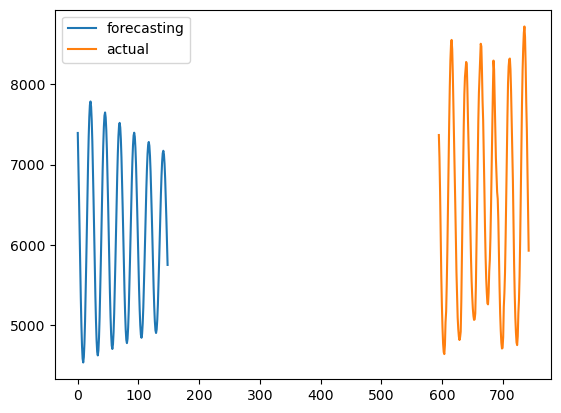

In [19]:
pred = auto_arima.predict(n_periods=len(test))
plt.plot(pred, label = "forecasting")
plt.legend()
plt.plot(test,label = "actual")
plt.legend()

In [20]:
rms = mean_squared_error(test, pred, squared=False)
rms

589.1086119010614

### Train every column with Auto_arima and Evaluate the Result by Rmse

In [53]:
def estimator(train):
    auto_arima = pm.auto_arima(train, stepwise=False, seasonal=True)
    return auto_arima

def predictor(model,test):
    pred = model.predict(n_periods=len(test))
    return pred

In [54]:
def harness(data):
    scores = []
    counter = 0
    for col in data.columns[1:]:
        print(f"{counter/len(data.columns[1:])} finished")
        counter += 1
        idx = int(0.8*data[col].shape[0])
        train = data[col][:idx]
        test = data[col][idx:]
        model = estimator(train)
        pred = predictor(model,test)
        rms = mean_squared_error(test, pred, squared=False)
        scores.append(rms)
    scores = np.array(scores)
    avg_score = np.mean(scores)
    return avg_score,scores

In [55]:
data.columns

Index(['CSWS', 'EDE', 'GRDA', 'INDN', 'KACY', 'KCPL', 'LES', 'MPS', 'NPPD',
       'OKGE', 'OPPD', 'SECI', 'SPRM', 'SPS', 'WAUE', 'WFEC', 'WR'],
      dtype='object')

In [56]:
avg_score,scores = harness(data)

0.0 finished
0.0625 finished
0.125 finished
0.1875 finished
0.25 finished
0.3125 finished
0.375 finished
0.4375 finished
0.5 finished
0.5625 finished
0.625 finished
0.6875 finished
0.75 finished
0.8125 finished
0.875 finished
0.9375 finished


In [68]:
avg_score

169.25591086700706

In [70]:
scores

array([589.04019367,  82.85167145,  88.32763631,  23.05109552,
        24.11761808, 206.85684052,  57.79230773, 111.85475067,
       329.57340121, 338.53823024, 162.8594808 ,  38.13105021,
        53.75519411, 181.03897123, 207.8910058 ,  72.52605962,
       309.14497756])

### Kalman Filter

In [21]:
csws = data['CSWS']
idx = int(0.8*csws.shape[0])
train = csws[:idx]
test = csws[idx:]

In [25]:
test

595    7367.402
596    7089.577
597    6664.034
598    6129.950
599    5617.760
         ...   
739    7772.379
740    7427.238
741    6952.782
742    6423.723
743    5929.526
Name: CSWS, Length: 149, dtype: float64

In [26]:
data.columns

Index(['MarketHour', 'CSWS', 'EDE', 'GRDA', 'INDN', 'KACY', 'KCPL', 'LES',
       'MPS', 'NPPD', 'OKGE', 'OPPD', 'SECI', 'SPRM', 'SPS', 'WAUE', 'WFEC',
       'WR'],
      dtype='object')

In [27]:
data = data.drop('MarketHour',axis = 1)

In [28]:
from pykalman import KalmanFilter
kf = KalmanFilter(n_dim_state=1, n_dim_obs=1)


In [29]:
kf.em(csws, n_iter=6)

In [47]:
f_means, f_covariances = kf.filter(csws)
s_means, s_covariances = kf.smooth(csws)

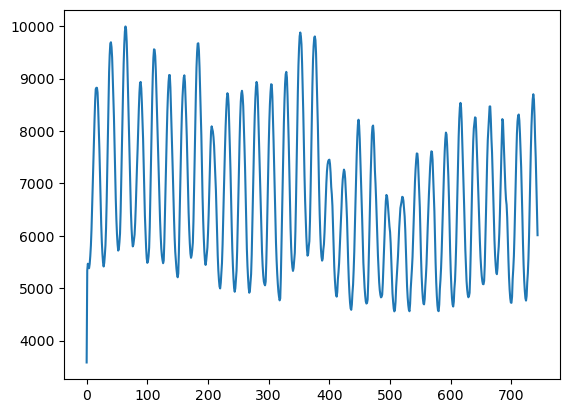

In [33]:
plt.plot(f_means)

In [36]:
vars(kf)

{'transition_matrices': array([[1.]]),
 'observation_matrices': array([[1.]]),
 'transition_covariance': array([[150911.74771787]]),
 'observation_covariance': array([[28911.46813318]]),
 'transition_offsets': array([0.]),
 'observation_offsets': array([0.]),
 'initial_state_mean': array([3582.8505952]),
 'initial_state_covariance': array([[0.38192808]]),
 'random_state': None,
 'em_vars': ['transition_covariance',
  'observation_covariance',
  'initial_state_mean',
  'initial_state_covariance'],
 'n_dim_state': 1,
 'n_dim_obs': 1}

In [35]:
next_mean, next_covariance = kf.filter_update(
   f_means[-1], covariances[-1], train.iloc[-1]
)

NameError: name 'covariances' is not defined

In [48]:
idx = int(0.8*csws.shape[0])
f_means, f_covariances = kf.filter(csws[:idx])
pred = []
for i in range(idx,csws.shape[0]):
    next_mean, next_covariance = kf.filter_update(
    f_means[-1], f_covariances[-1], csws.iloc[i]
        )
    print(f_means[-1])
    print(csws.iloc[i])
    print(next_mean)
    # CC: bug was because np.append returns a copy, and does not append in-place
    f_means = np.append(f_means,[next_mean])

    f_covariances = np.append(f_covariances,[next_covariance])
    pred.append(f_means[-1])
# print(pred)
    

[7730.94367531]
7367.402
[7418.76045988]
7418.760459879459
7089.577
[[7136.08158714]]
7136.081587136883
6664.034
[[6730.72136685]]
6730.721366846442
6129.95
[[6214.82250359]]
6214.822503585341
5617.76
[[5702.10854301]]
5702.108543010992
5248.206
[[5312.32997017]]
5312.32997017407
4973.541
[[5021.40258208]]
5021.40258208023
4771.994
[[4807.22858664]]
4807.228586641393
4669.159
[[4688.66444273]]
4688.664442725674
4643.612
[[4649.97667351]]
4649.976673514377
4755.823
[[4740.86981944]]
4740.869819439312
5039.314
[[4997.15202927]]
4997.152029269568
5173.138
[[5148.27601297]]
5148.276012967908
5508.909
[[5457.96145793]]
5457.9614579333065
5928.496
[[5862.02238489]]
5862.022384890461
6477.659
[[6390.68644487]]
6390.686444870708
7039.2
[[6947.58283568]]
6947.582835683775
7515.077
[[7434.90565171]]
7434.9056517075305
7960.001
[[7885.81944061]]
7885.819440608222
8292.706
[[8235.22409777]]
8235.224097771406
8485.928
[[8450.51042018]]
8450.510420176835
8549.711
[[8535.69668102]]
8535.696681023874


In [50]:
test = csws[idx:]
np.array(pred).shape

(149,)

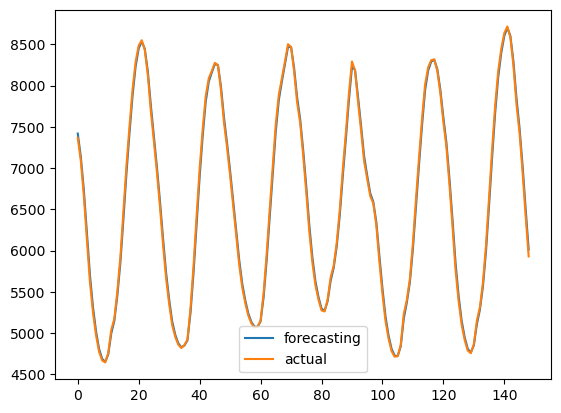

In [51]:
test = csws[idx:].reset_index(drop = True)
plt.plot(pred, label = "forecasting")
plt.legend()
plt.plot(test,label = "actual")
plt.legend()